In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab as pl

import colombia_weather
import prepare

In [2]:
df = prepare.get_prepped()

In [3]:
df1 = prepare.get_data()

### Data Dictionary
1. region: Coffee producing region in Colombia (top 13 regions)
2. mean_precip: mean precipitation in Colombia (cm)
3. mean_temp: average temperature in Colombia region (degrees F)
4. min_temp: minimum temperature (degrees F)
5. max_temp: maximum temperature (degrees F)
6. price: export price of excelso coffee USD per lb
7. quanity: thousands of 60kg bags of coffee exported 
8. inflated: export price adjusted for inflation in 2018 dollars  

In [4]:
df.head(3)

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.68,387.519181,0.040000,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.95,389.809684,0.040000,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367
1960-03-01,266.0,45.10,382.598841,0.143158,71.875000,54.741925,0.124545,58.347826,34.199076,0.012903,...,66.368796,0.061226,83.154188,73.557848,-0.178350,87.567455,76.982745,0.154044,69.713106,61.178475


In [5]:
df.shape

(708, 42)

In [6]:
df.describe()

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,888.759887,117.042459,287.522823,0.205316,73.056972,59.601523,0.111022,55.799535,36.948408,0.168615,...,68.711412,0.303984,82.500963,70.799932,0.161536,85.741351,72.637999,0.143983,71.144774,62.385355
std,381.462823,60.337486,161.812973,0.194527,1.878465,3.126061,0.130392,1.238506,4.892166,0.208815,...,3.293696,0.226430,1.544705,3.481000,0.233844,1.780971,2.427677,0.198461,1.348889,2.002072
min,127.000000,37.270000,79.446600,0.000000,67.633333,41.000000,0.000000,52.096774,20.000000,0.000000,...,50.000000,-0.054432,76.500000,52.000000,-0.178350,80.000000,63.000000,0.000000,66.000000,50.000000
25%,620.750000,62.390000,165.116364,0.117473,71.734127,58.477283,0.052315,54.967742,34.000000,0.057231,...,67.010908,0.144649,81.571429,70.000000,0.018400,84.596552,71.400667,0.074420,70.168146,61.260518
50%,830.500000,122.592833,287.605531,0.189282,73.000000,60.171341,0.091488,55.741935,37.000000,0.136231,...,69.168936,0.276590,82.468180,71.550107,0.123731,85.835993,72.843232,0.126492,71.100750,63.000000
75%,1096.500000,150.430000,356.107896,0.248600,74.130108,61.733187,0.142182,56.612903,40.000000,0.216435,...,71.000000,0.413215,83.355415,72.000000,0.242173,86.963174,74.000000,0.167565,71.965150,63.813985
max,2755.000000,319.670000,1324.610143,2.550000,81.000000,69.000000,1.996667,59.935484,50.000000,2.775000,...,75.000000,1.711429,87.714286,77.000000,3.160000,91.000000,79.000000,4.620000,76.000000,68.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 1960-01-01 to 2018-12-01
Data columns (total 42 columns):
quantity                    708 non-null float64
price                       708 non-null float64
inflated                    708 non-null float64
Caldas_mean_precip          708 non-null float64
Caldas_mean_temp            708 non-null float64
Caldas_min_temp             708 non-null float64
Cundinamarca_mean_precip    708 non-null float64
Cundinamarca_mean_temp      708 non-null float64
Cundinamarca_min_temp       708 non-null float64
Narino_mean_precip          708 non-null float64
Narino_mean_temp            708 non-null float64
Narino_min_temp             708 non-null float64
Cauca_mean_precip           708 non-null float64
Cauca_mean_temp             708 non-null float64
Cauca_min_temp              708 non-null float64
Risaralda_mean_precip       708 non-null float64
Risaralda_mean_temp         708 non-null float64
Risaralda_min_temp          708 non-null fl

In [8]:
df1.head(3)

,region,mean_precip,mean_temp,min_temp,price,quantity,inflated
date,,,,,,,
1960-01-01,Caldas,0.04,72.500000,NaN,45.68,782.0,387.519181
1960-01-01,Cundinamarca,0.28,58.250000,NaN,45.68,782.0,387.519181
1960-02-01,Caldas,0.04,72.210526,NaN,45.95,449.0,389.809684


In [9]:
df1.shape

(7199, 7)

In [10]:
df1.describe()

,mean_precip,mean_temp,min_temp,price,quantity,inflated
count,5594.000000,6974.000000,6715.000000,7199.000000,7199.000000,7199.000000
mean,0.232269,73.824772,59.647655,124.844434,908.786012,285.931798
std,0.359864,10.446067,13.129839,60.170478,380.207469,175.068943
min,0.000000,49.000000,20.000000,37.270000,127.000000,79.446600
25%,0.052186,69.917500,54.000000,70.160000,647.000000,159.021831
50%,0.134661,74.150376,63.000000,128.020000,857.000000,266.159736
75%,0.279215,82.632895,71.000000,157.330000,1114.000000,356.103554
max,10.040000,91.000000,80.000000,319.670000,2755.000000,1324.610143


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7199 entries, 1960-01-01 to 2018-12-01
Data columns (total 7 columns):
region         7198 non-null object
mean_precip    5594 non-null float64
mean_temp      6974 non-null float64
min_temp       6715 non-null float64
price          7199 non-null float64
quantity       7199 non-null float64
inflated       7199 non-null float64
dtypes: float64(6), object(1)
memory usage: 449.9+ KB


In [12]:
pd.plotting.register_matplotlib_converters()

## *Hypothesis: Day-to-day weather does not influence coffee prices, but unusual weather events have a great impact on prices.*

To Do:
- Look at each region independently vs price
- Look at each weather feature vs price 
- Look at the delta in temp compared to price (max vs min)
- Look at quantity vs price 
- Look at extreme events to label
- Possible statistical tests

### Prepped dataframe

In [13]:
df.columns

Index(['quantity', 'price', 'inflated', 'Caldas_mean_precip',
       'Caldas_mean_temp', 'Caldas_min_temp', 'Cundinamarca_mean_precip',
       'Cundinamarca_mean_temp', 'Cundinamarca_min_temp', 'Narino_mean_precip',
       'Narino_mean_temp', 'Narino_min_temp', 'Cauca_mean_precip',
       'Cauca_mean_temp', 'Cauca_min_temp', 'Risaralda_mean_precip',
       'Risaralda_mean_temp', 'Risaralda_min_temp', 'Antioquia_mean_precip',
       'Antioquia_mean_temp', 'Antioquia_min_temp', 'Huila_mean_precip',
       'Huila_mean_temp', 'Huila_min_temp', 'Magdalena_mean_precip',
       'Magdalena_mean_temp', 'Magdalena_min_temp', 'Quindio_mean_precip',
       'Quindio_mean_temp', 'Quindio_min_temp', 'Tolima_mean_precip',
       'Tolima_mean_temp', 'Tolima_min_temp', 'Valle_mean_precip',
       'Valle_mean_temp', 'Valle_min_temp', 'Cesar_mean_precip',
       'Cesar_mean_temp', 'Cesar_min_temp', 'Santander_mean_precip',
       'Santander_mean_temp', 'Santander_min_temp'],
      dtype='object')

In [14]:
# Price
pmax = df.price.max()
pmin = df.price.min()
pmean = round(df.price.mean(), 2)

print(f'The max price we have is: ${pmax}')
print(f'The min price we have for coffee is: ${pmin}')
print(f'The overall average price for coffee is: ${pmean}')

The max price we have is: $319.67
The min price we have for coffee is: $37.27
The overall average price for coffee is: $117.04


In [15]:
# Inflated price
pmax = round(df.inflated.max(), 2)
pmin = round(df.inflated.min(), 2)
pmean = round(df.inflated.mean(), 2)

print(f'The max inflated price we have is: ${pmax}')
print(f'The min inflated price we have for coffee is: ${pmin}')
print(f'The overall average inflated price for coffee is: ${pmean}')

The max inflated price we have is: $1324.61
The min inflated price we have for coffee is: $79.45
The overall average inflated price for coffee is: $287.52


In [16]:
quantity = round(df.quantity.mean(), 2)

print(f'The average quantity of coffee exported is: {quantity}')

The average quantity of coffee exported is: 888.76


### How does price before and after inflation look?

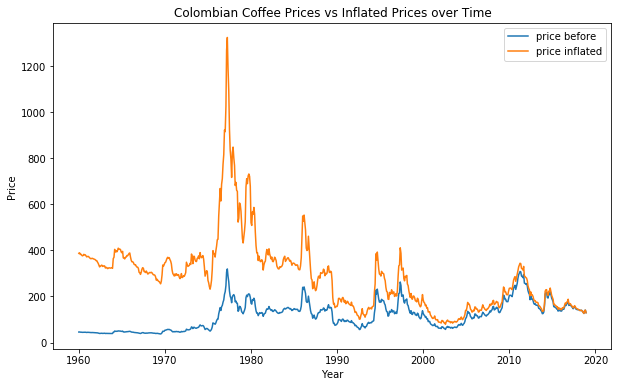

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df.price)
plt.plot(df.inflated)
plt.title('Colombian Coffee Prices vs Inflated Prices over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['price before', 'price inflated'])
plt.show()

**Takeaways:** There are larger differences in the data in the earlier years, probably because the rate of inflation we are using is from 2018. Lines really start to blend together around 1990 and on.

### What does inflated price look like over time?

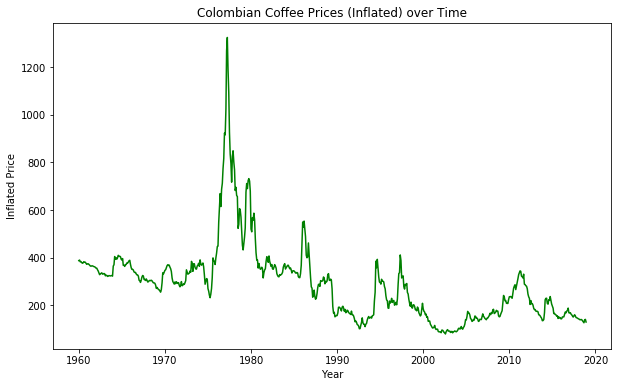

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df.inflated, color='Green')
plt.title('Colombian Coffee Prices (Inflated) over Time')
plt.xlabel('Year')
plt.ylabel('Inflated Price')
plt.show()

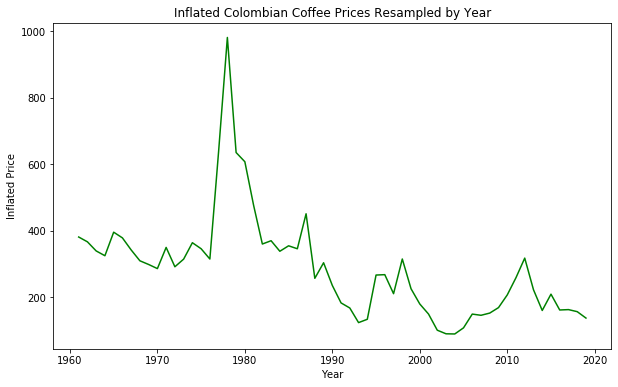

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df.inflated.resample('Y').mean(), color='Green')
plt.title('Inflated Colombian Coffee Prices Resampled by Year')
plt.xlabel('Year')
plt.ylabel('Inflated Price')
plt.show()

**Takeaways:** There is a huge price peak around 1975 and then an elongated dip just after 2000. The price appears to even out after 1990, potentially due to the Colombian coffee market stabalizing.

**To Do:** Add in vlines into inflation plot to point out the top changes in price.

### Highlight the top five price changes over time

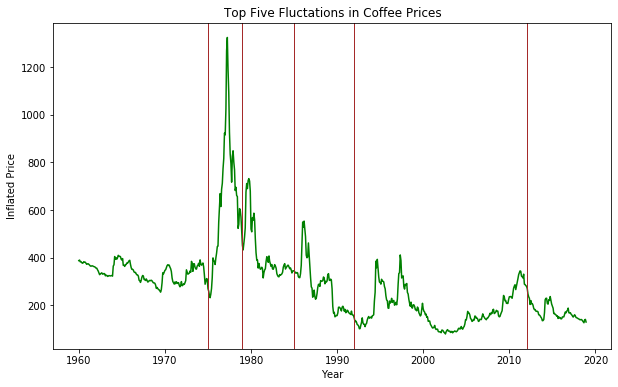

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.inflated, color='Green')
date_ = '1975'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
date_ = '1979'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
date_ = '1985'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
date_ = '1992'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
date_ = '2012'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
plt.title('Top Five Fluctations in Coffee Prices')
plt.xlabel('Year')
plt.ylabel('Inflated Price')
plt.show()

### What does the distribution of inflated price look like?

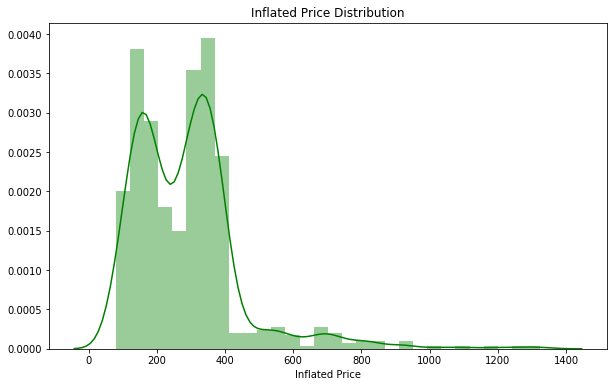

In [21]:
plt.figure(figsize=(10, 6))
sns.distplot(df.inflated, color='green')
plt.title('Inflated Price Distribution')
plt.xlabel('Inflated Price')
plt.show()

**Takeaways:** The inflated price in our data is bi-modal. According to the plots above, the distribution appears to even out after around 1990. Even with the bi-modal distribtuion, the distribution eventually tails out to the right.

**To Do:** Separate out the data to look at each distribution on its own, pre 1990 and post 1990.

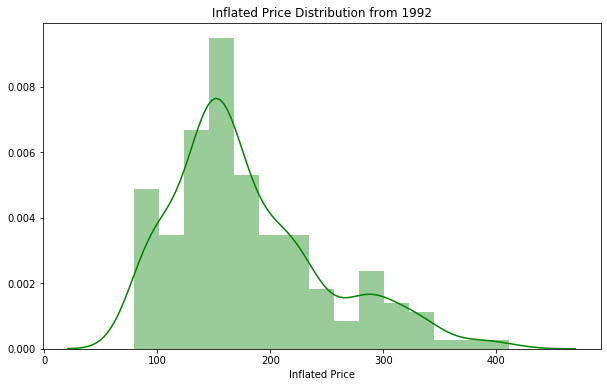

In [22]:
plt.figure(figsize=(10, 6))
sns.distplot(df.inflated.loc['1992':], color='green')
plt.title('Inflated Price Distribution from 1992')
plt.xlabel('Inflated Price')
plt.show()

**Takeaways:** The distribution of data after 1992 shows that a more even distribution, even if it has a tail to the right still. This distribution is relatively normal.

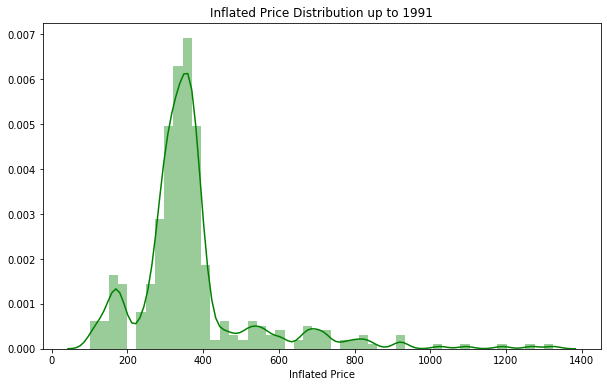

In [23]:
plt.figure(figsize=(10, 6))
sns.distplot(df.inflated.loc[:'1992'], color='green')
plt.title('Inflated Price Distribution up to 1991')
plt.xlabel('Inflated Price')
plt.show()

**Takeaways:** The large spike around 1975 had such a large impact on the data that it cause the data to becom bi-modal. When looking at this distribution on its own, the data is relatively even except from the large spike, with a tail to the right.

### Is there any obvious correlation between the features and price?

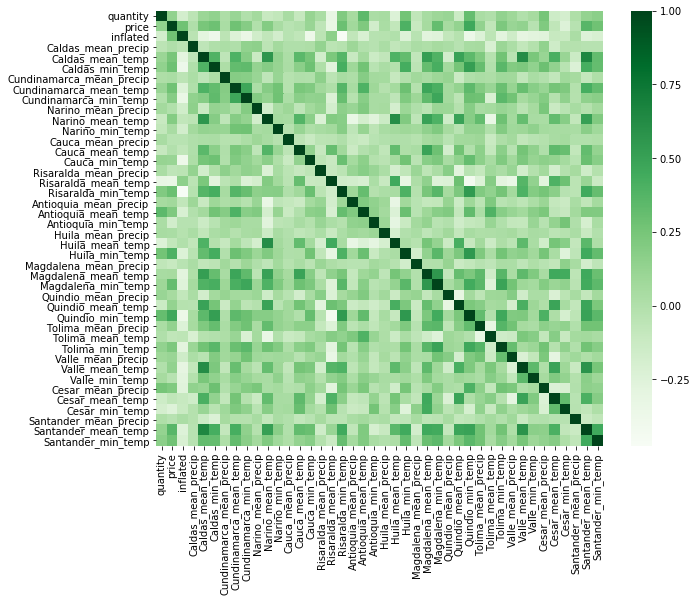

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='Greens')
plt.show()

In [25]:
df.corr()

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
quantity,1.000000,0.144568,-0.177711,-0.050503,0.105027,0.143549,0.020502,0.108860,0.000452,0.061669,...,0.136141,0.086493,0.002315,0.050179,0.255531,-0.142016,-0.181456,0.011856,0.130367,0.165140
price,0.144568,1.000000,0.279458,0.004499,0.243764,0.284934,0.034332,0.276348,0.188803,0.000255,...,0.224919,0.108439,0.136306,-0.027646,0.214973,-0.071481,-0.242746,-0.026861,0.365416,0.277260
inflated,-0.177711,0.279458,1.000000,-0.039081,-0.280974,-0.375244,-0.053835,-0.237206,-0.339675,-0.162170,...,-0.278291,-0.149349,-0.298727,-0.272692,-0.257810,-0.102738,-0.114113,0.028623,-0.240211,-0.208809
Caldas_mean_precip,-0.050503,0.004499,-0.039081,1.000000,-0.060994,0.008449,0.025044,0.007213,0.142239,0.155559,...,0.101985,0.021132,-0.080531,-0.012735,0.142434,-0.150611,-0.015189,-0.018398,-0.029583,-0.029522
Caldas_mean_temp,0.105027,0.243764,-0.280974,-0.060994,1.000000,0.392211,-0.064544,0.395869,0.184052,-0.117708,...,0.270471,-0.033050,0.621570,0.233987,0.115587,0.415094,0.112507,-0.132384,0.658698,0.322774
Caldas_min_temp,0.143549,0.284934,-0.375244,0.008449,0.392211,1.000000,0.017568,0.325804,0.335468,0.125051,...,0.356845,0.204792,0.226994,0.141829,0.290154,0.140632,-0.035606,-0.232818,0.428691,0.317777
Cundinamarca_mean_precip,0.020502,0.034332,-0.053835,0.025044,-0.064544,0.017568,1.000000,0.189767,0.176495,0.107768,...,0.080853,0.076152,-0.073138,0.032177,-0.007363,-0.079079,0.079698,0.053524,-0.084590,0.012775
Cundinamarca_mean_temp,0.108860,0.276348,-0.237206,0.007213,0.395869,0.325804,0.189767,1.000000,0.466577,0.022098,...,0.297888,0.119350,0.306058,0.176855,0.115098,0.261211,0.221819,-0.009954,0.427468,0.323003
Cundinamarca_min_temp,0.000452,0.188803,-0.339675,0.142239,0.184052,0.335468,0.176495,0.466577,1.000000,0.197128,...,0.354289,0.270808,0.053260,0.112973,0.196768,-0.016030,0.152739,-0.017461,0.150890,0.174097
Narino_mean_precip,0.061669,0.000255,-0.162170,0.155559,-0.117708,0.125051,0.107768,0.022098,0.197128,1.000000,...,0.114189,0.083585,-0.042301,0.051738,0.237027,-0.118473,-0.033726,0.043832,-0.018904,0.061394


**Takeaways:** There is no major correlation between each region's weather and the inflated price.

### Precipitation

In [26]:
columns = [col for col in df.columns if col.endswith('mean_precip')]

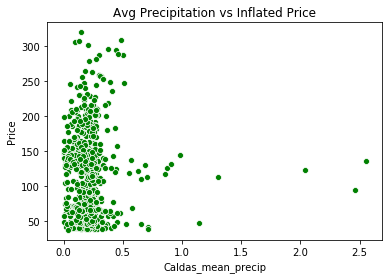

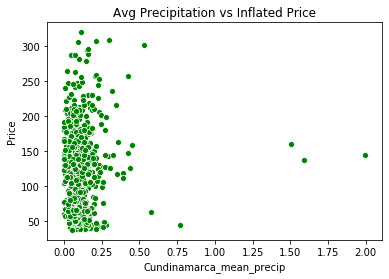

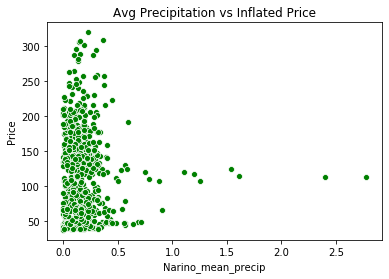

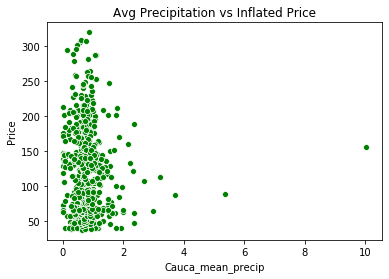

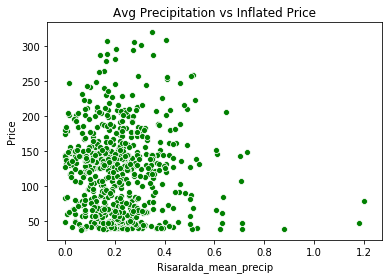

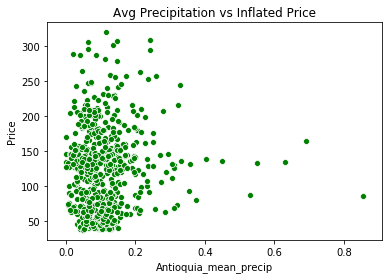

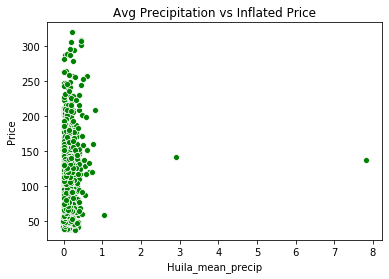

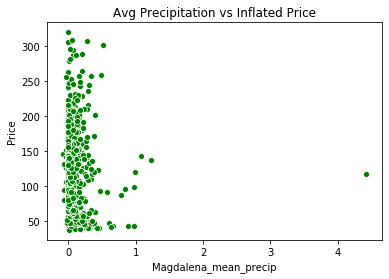

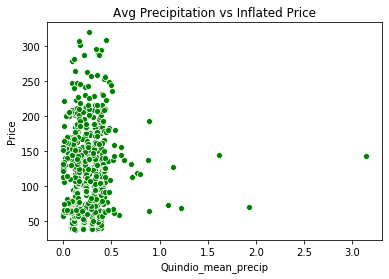

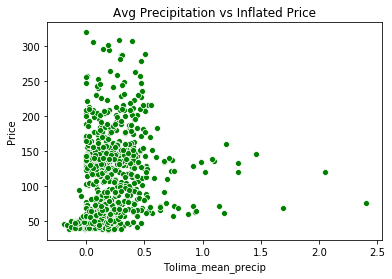

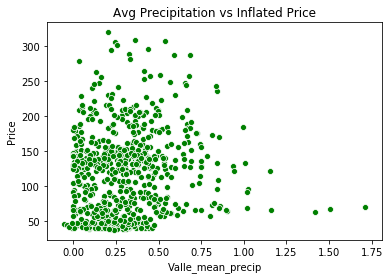

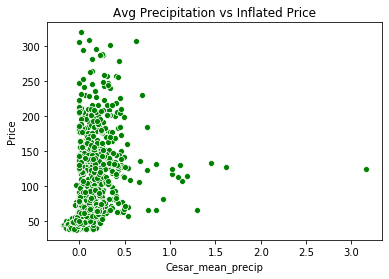

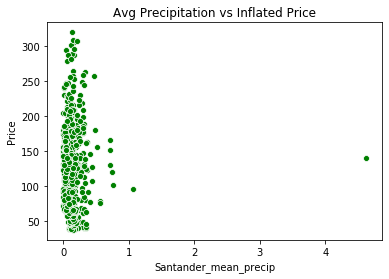

In [27]:
for col in columns:
    sns.scatterplot(df[col], df.price, color='green')
    plt.title('Avg Precipitation vs Inflated Price')
    plt.ylabel('Price')
    plt.show()

**Takeaways:** Each region has its own amount of precipitation, with some anomalous data points showing higher levels of precipitation. Even with the high levels of precipitation, the price does not go up, it stays around 150 and below.

**To Do:** Create a line chart to show differences in each region's precipitation.

### Get clear visual of outliers

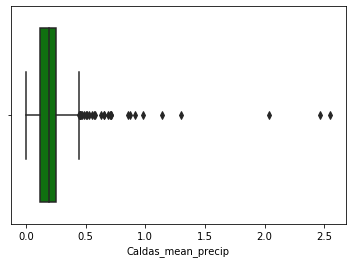

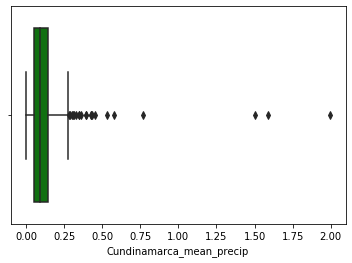

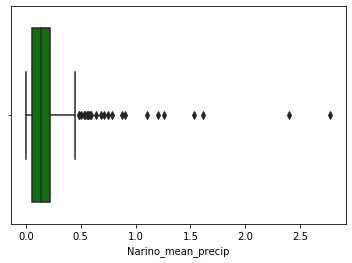

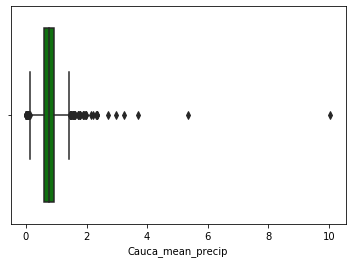

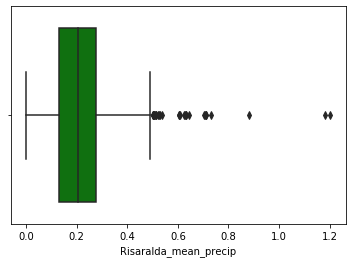

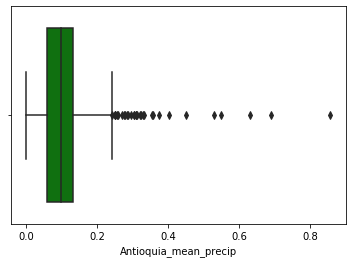

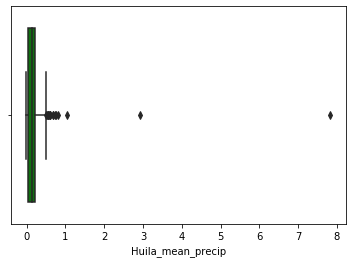

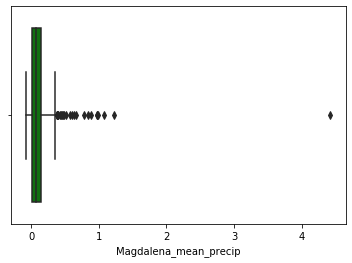

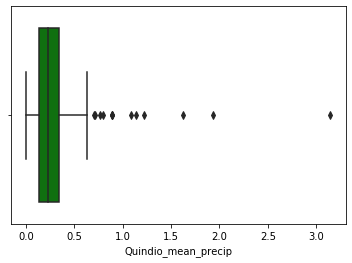

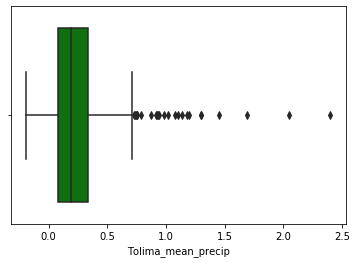

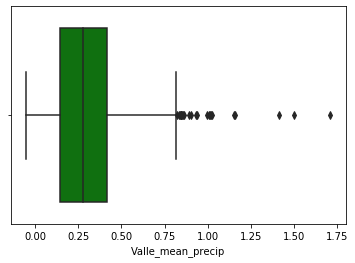

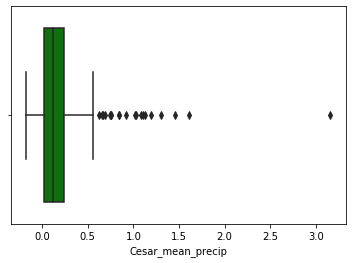

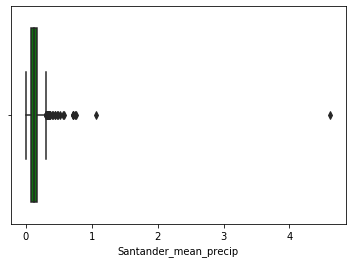

In [28]:
for col in columns:
    sns.boxplot(df[col], color='green')
    plt.show()

### Look at the precipitation in each different regions

In [29]:
cauca = round(df.Cauca_mean_precip.mean(),2)
narino = round(df.Narino_mean_precip.mean(),2)
huila = round(df.Huila_mean_precip.mean(),2)

print(f'The average precipitation in Cauca is: {cauca} cm.')
print(f'The average precipitation in Narino is: {narino} cm.')
print(f'The average precipitation in Huila is: {huila} cm.')

The average precipitation in Cauca is: 0.8 cm.
The average precipitation in Narino is: 0.17 cm.
The average precipitation in Huila is: 0.16 cm.


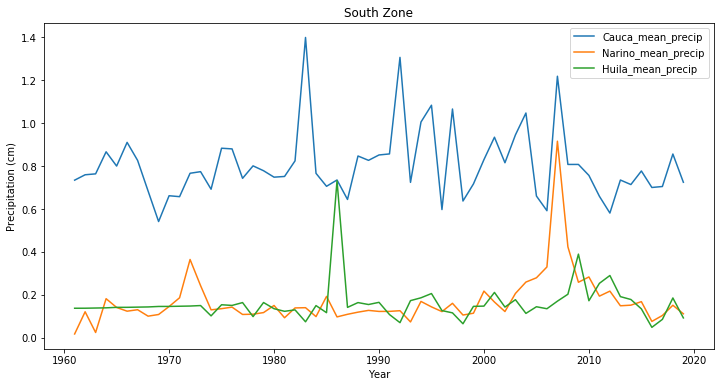

In [30]:
# South Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cauca_mean_precip.resample('Y').mean())
plt.plot(df.Narino_mean_precip.resample('Y').mean())
plt.plot(df.Huila_mean_precip.resample('Y').mean())
plt.title('South Zone')
plt.xlabel('Year')
plt.ylabel('Precipitation (cm)')
plt.legend(df[['Cauca_mean_precip', 'Narino_mean_precip', 'Huila_mean_precip']])
plt.show()

In [31]:
cesar = round(df.Cesar_mean_precip.mean(),2)
mag = round(df.Magdalena_mean_precip.mean(),2)

print(f'The average precipitation in Cesar is: {cesar} cm.')
print(f'The average precipitation in Magdalena is: {mag} cm.')

The average precipitation in Cesar is: 0.16 cm.
The average precipitation in Magdalena is: 0.11 cm.


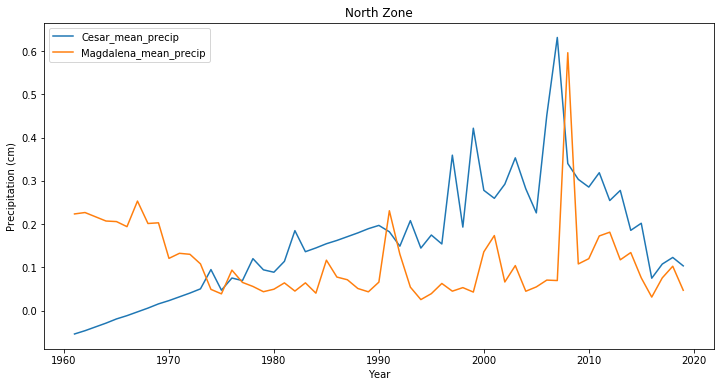

In [32]:
# North Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cesar_mean_precip.resample('Y').mean())
plt.plot(df.Magdalena_mean_precip.resample('Y').mean())
plt.legend(df[['Cesar_mean_precip', 'Magdalena_mean_precip']])
plt.title('North Zone')
plt.xlabel('Year')
plt.ylabel('Precipitation (cm)')
plt.show()

**Takeaways:** The distribution of precipitation in the Northern coffee producing regions are very similar. There are a few natural differences in the lines, but overall, they have the same spikes and dips.

In [33]:
caldas = round(df.Caldas_mean_precip.mean(),2)
ris = round(df.Risaralda_mean_precip.mean(),2)
antioquia = round(df.Antioquia_mean_precip.mean(),2)
tolima = round(df.Tolima_mean_precip.mean(),2)
valle = round(df.Valle_mean_precip.mean(),2)
quindio = round(df.Quindio_mean_precip.mean(),2)

print(f'The average precipitation in Caldas is: {caldas} cm.')
print(f'The average precipitation in Risaralda is: {ris} cm.')
print(f'The average precipitation in Antioquia is: {antioquia} cm.')
print(f'The average precipitation in Tolima is: {tolima} cm.')
print(f'The average precipitation in Valle is: {valle} cm.')
print(f'The average precipitation in Quindio is: {quindio} cm.')

The average precipitation in Caldas is: 0.21 cm.
The average precipitation in Risaralda is: 0.22 cm.
The average precipitation in Antioquia is: 0.11 cm.
The average precipitation in Tolima is: 0.23 cm.
The average precipitation in Valle is: 0.3 cm.
The average precipitation in Quindio is: 0.25 cm.


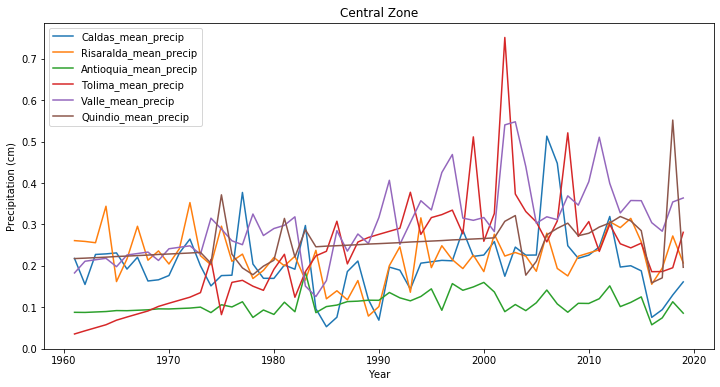

In [34]:
# Central Zone
plt.figure(figsize=(12,6))
plt.plot(df.Caldas_mean_precip.resample('Y').mean())
plt.plot(df.Risaralda_mean_precip.resample('Y').mean())
plt.plot(df.Antioquia_mean_precip.resample('Y').mean())
plt.plot(df.Tolima_mean_precip.resample('Y').mean())
plt.plot(df.Valle_mean_precip.resample('Y').mean())
plt.plot(df.Quindio_mean_precip.resample('Y').mean())
plt.legend(df[['Caldas_mean_precip', 'Risaralda_mean_precip', 'Antioquia_mean_precip', 'Tolima_mean_precip', 'Valle_mean_precip', 'Quindio_mean_precip']])
plt.title('Central Zone')
plt.xlabel('Year')
plt.ylabel('Precipitation (cm)')
plt.show()

**Takeaways:** In this colorful graph the average precipitation appears to be very similar in general. The precipitation in Tolima spikes around 2001, which is interesting since in this data, its starting point was the lowest out of all the regions in this zone. The precipitation in Antioquia is pretty low compared to the rest of the regions.

In [35]:
sant = round(df.Santander_mean_precip.mean(),2)
cun = round(df.Cundinamarca_mean_precip.mean(),2)

print(f'The average precipitation in Santander is: {sant} cm.')
print(f'The average precipitation in Cundinamarca is: {cun} cm.')

The average precipitation in Santander is: 0.14 cm.
The average precipitation in Cundinamarca is: 0.11 cm.


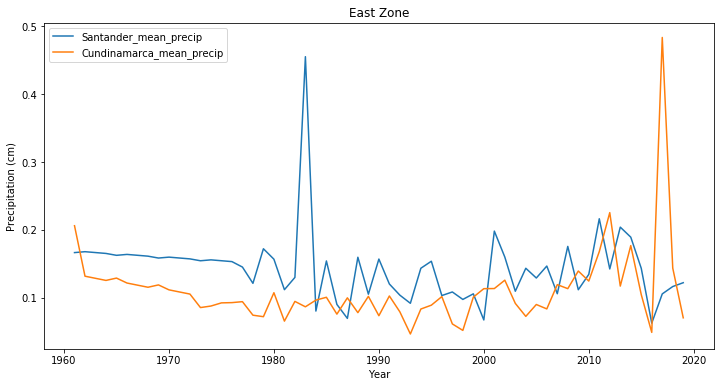

In [36]:
# East Zone
plt.figure(figsize=(12,6))
plt.plot(df.Santander_mean_precip.resample('Y').mean())
plt.plot(df.Cundinamarca_mean_precip.resample('Y').mean())
plt.legend(df[['Santander_mean_precip', 'Cundinamarca_mean_precip']])
plt.title('East Zone')
plt.xlabel('Year')
plt.ylabel('Precipitation (cm)')
plt.show()

**Takeaways:** The precipitation in the Eastern regions is very similar, apart from a large spike in Santander around 1981 and then a large spike in Cundinamarca around 2016.

**To Do:** Narrow in on those spikes in the data and search if any significant events took place in those areas.

### Average Temperature

In [37]:
columns = [col for col in df.columns if col.endswith('mean_temp')]

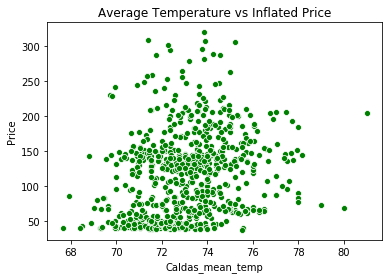

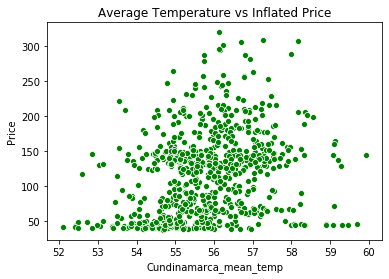

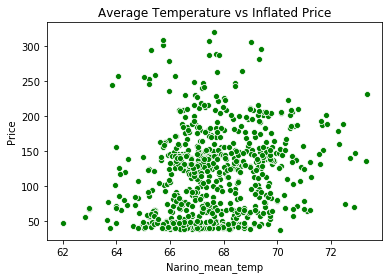

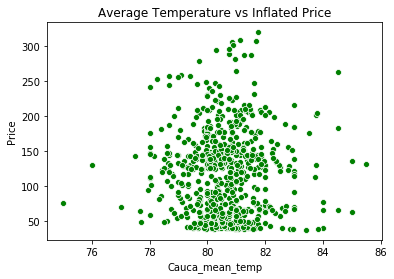

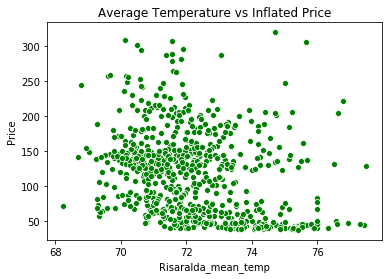

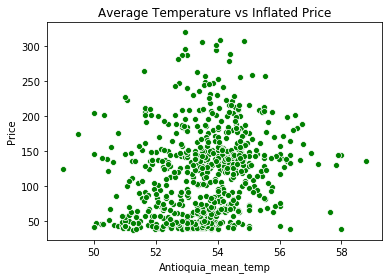

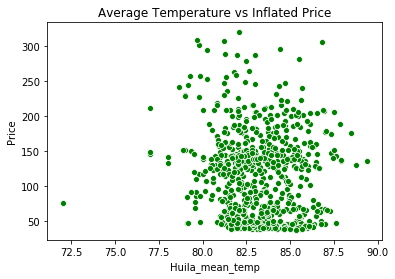

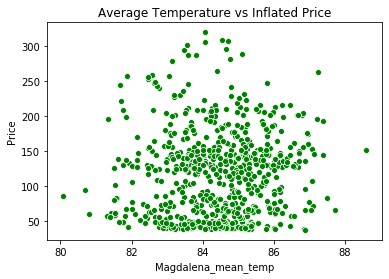

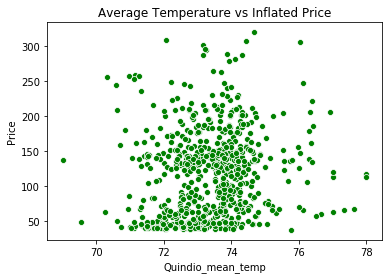

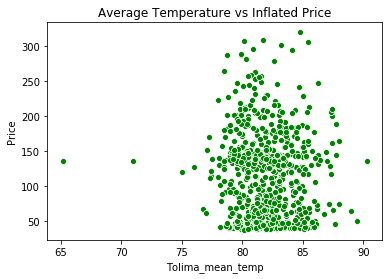

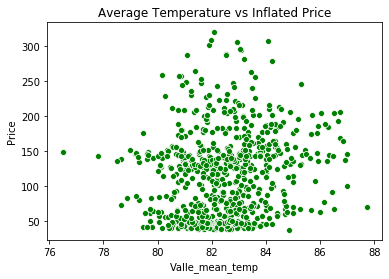

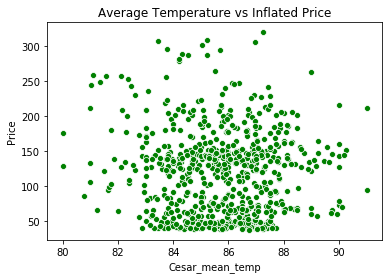

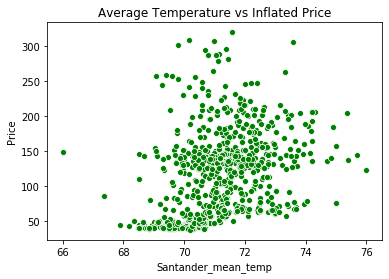

In [38]:
for col in columns:
    sns.scatterplot(df[col], df.price, color='green')
    plt.title('Average Temperature vs Inflated Price')
    plt.ylabel('Price')
    plt.show()

**Takeaways:** There is no obvious correlation between average temperature and inflated price. Most of the regions have the same circular shape that spreads out away from the mean temp, and each region has its own average temperature. 

### Are there a lot of outliers in the average temperature?

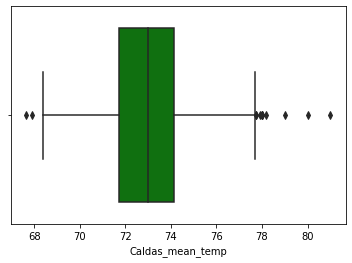

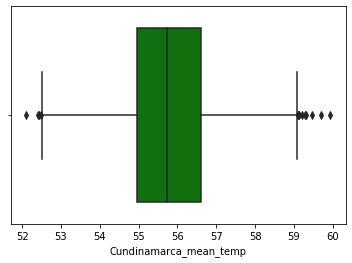

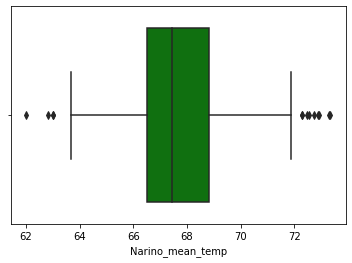

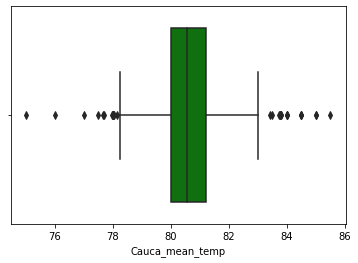

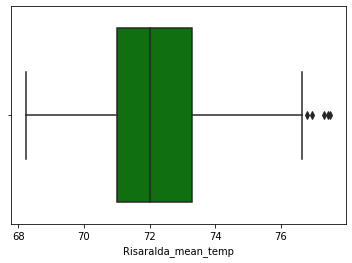

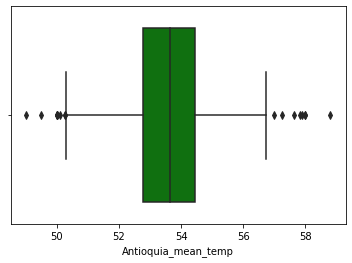

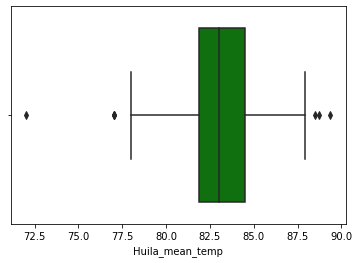

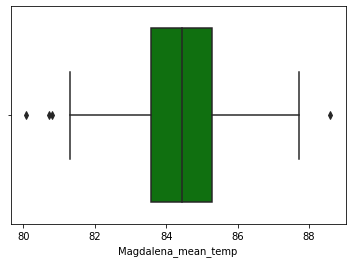

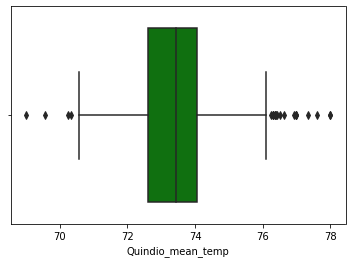

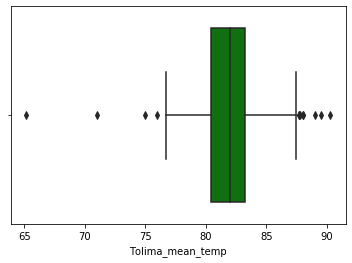

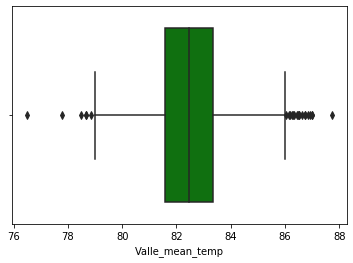

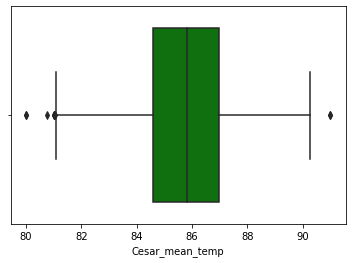

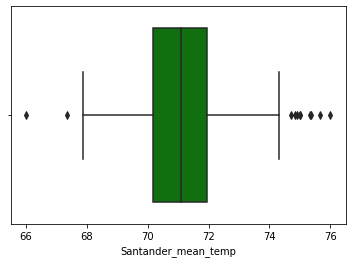

In [39]:
for col in columns:
    sns.boxplot(df[col], color='green')
    plt.show()

### Look at the average temperature of zone to compare

In [40]:
cauca = round(df.Cauca_mean_temp.mean(),2)
narino = round(df.Narino_mean_temp.mean(),2)
huila = round(df.Huila_mean_temp.mean(),2)

print(f'The average temperature in Cauca is: {cauca} F.')
print(f'The average temperature in Narino is: {narino} F.')
print(f'The average temperature in Huila is: {huila} F.')

The average temperature in Cauca is: 80.6 F.
The average temperature in Narino is: 67.65 F.
The average temperature in Huila is: 83.16 F.


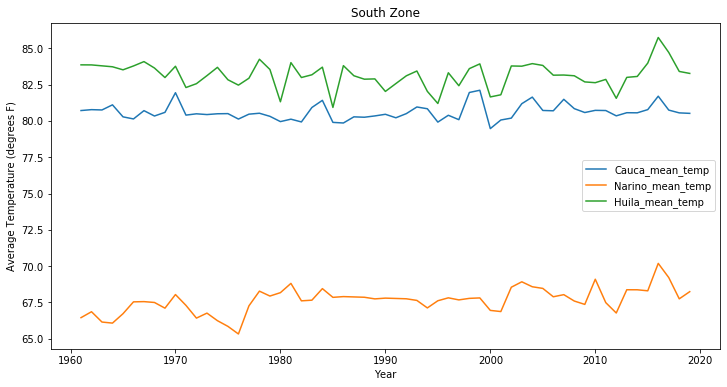

In [41]:
# South Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cauca_mean_temp.resample('Y').mean())
plt.plot(df.Narino_mean_temp.resample('Y').mean())
plt.plot(df.Huila_mean_temp.resample('Y').mean())
plt.title('South Zone')
plt.xlabel('Year')
plt.ylabel('Average Temperature (degrees F)')
plt.legend(df[['Cauca_mean_temp', 'Narino_mean_temp', 'Huila_mean_temp']])
plt.show()

**Takeaways:** The overall trend in average temperatures are the same, though Narino has a significantly lower average temperature than the other two regions.

In [42]:
cesar = round(df.Cesar_mean_temp.mean(),2)
mag = round(df.Magdalena_mean_temp.mean(),2)

print(f'The average temperature in Cesar is: {cesar} F.')
print(f'The average temperature in Magdalena is: {mag} F.')

The average temperature in Cesar is: 85.74 F.
The average temperature in Magdalena is: 84.42 F.


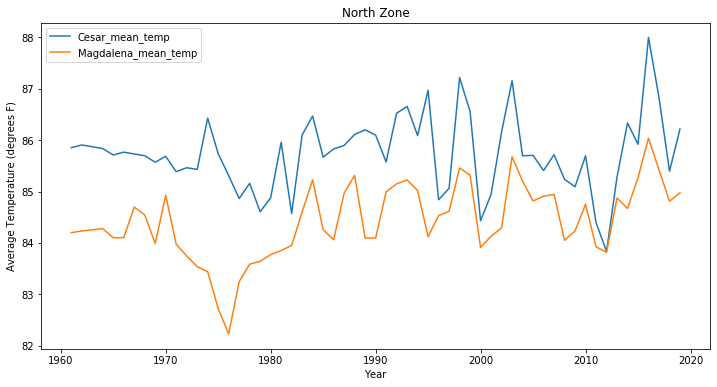

In [43]:
# North Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cesar_mean_temp.resample('Y').mean())
plt.plot(df.Magdalena_mean_temp.resample('Y').mean())
plt.legend(df[['Cesar_mean_temp', 'Magdalena_mean_temp']])
plt.title('North Zone')
plt.xlabel('Year')
plt.ylabel('Average Temperature (degrees F)')
plt.show()

**Takeaways:** As with the southern region, the two northern regions have very similar distribution over time. Magdalena has a lower dip in temperature around 1975, could have possibly been affected by the frost?

In [44]:
caldas = round(df.Caldas_mean_temp.mean(),2)
ris = round(df.Risaralda_mean_temp.mean(),2)
antioquia = round(df.Antioquia_mean_temp.mean(),2)
tolima = round(df.Tolima_mean_temp.mean(),2)
valle = round(df.Valle_mean_temp.mean(),2)
quindio = round(df.Quindio_mean_temp.mean(),2)

print(f'The average temperature in Caldas is: {caldas} F.')
print(f'The average temperature in Risaralda is: {ris} F.')
print(f'The average temperature in Antioquia is: {antioquia} F.')
print(f'The average temperature in Tolima is: {tolima} F.')
print(f'The average temperature in Valle is: {valle} F.')
print(f'The average temperature in Quindio is: {quindio} F.')

The average temperature in Caldas is: 73.06 F.
The average temperature in Risaralda is: 72.26 F.
The average temperature in Antioquia is: 53.57 F.
The average temperature in Tolima is: 81.96 F.
The average temperature in Valle is: 82.5 F.
The average temperature in Quindio is: 73.37 F.


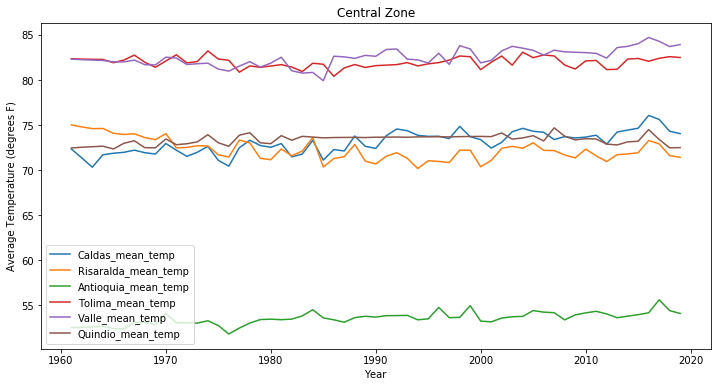

In [45]:
# Central Zone
plt.figure(figsize=(12,6))
plt.plot(df.Caldas_mean_temp.resample('Y').mean())
plt.plot(df.Risaralda_mean_temp.resample('Y').mean())
plt.plot(df.Antioquia_mean_temp.resample('Y').mean())
plt.plot(df.Tolima_mean_temp.resample('Y').mean())
plt.plot(df.Valle_mean_temp.resample('Y').mean())
plt.plot(df.Quindio_mean_temp.resample('Y').mean())
plt.legend(df[['Caldas_mean_temp', 'Risaralda_mean_temp', 'Antioquia_mean_temp', 'Tolima_mean_temp', 'Valle_mean_temp', 'Quindio_mean_temp']])
plt.title('Central Zone')
plt.xlabel('Year')
plt.ylabel('Average Temperature (degrees F)')
plt.show()

**Takeaways:** In the Central zone, there are no drastic changes in temperature except that Antioquia has a significantly lower average temperature than the rest of the regions.

In [46]:
sant = round(df.Santander_mean_temp.mean(),2)
cun = round(df.Cundinamarca_mean_temp.mean(),2)

print(f'The average temperature in Santander is: {sant} F.')
print(f'The average temperature in Cundinamarca is: {cun} F.')

The average temperature in Santander is: 71.14 F.
The average temperature in Cundinamarca is: 55.8 F.


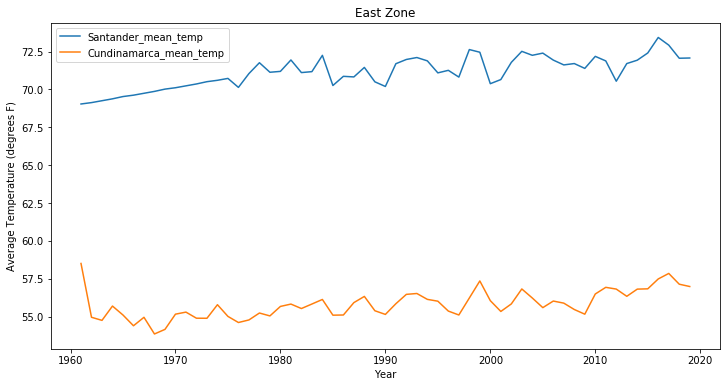

In [47]:
# East Zone
plt.figure(figsize=(12,6))
plt.plot(df.Santander_mean_temp.resample('Y').mean())
plt.plot(df.Cundinamarca_mean_temp.resample('Y').mean())
plt.legend(df[['Santander_mean_temp', 'Cundinamarca_mean_temp']])
plt.title('East Zone')
plt.xlabel('Year')
plt.ylabel('Average Temperature (degrees F)')
plt.show()

**Takeaways:** Each of these regions has very different average temperatures, but the peaks and valleys of the lines are pretty similar. The start of the Santander data has an upward trend until around 1974 and the start of Cundinamarca starts off higher, then drops almost immediately around 1962. It looks like the start of this data is the max (average) temperature throughout.

### Minimum Temperature

In [48]:
columns = [col for col in df.columns if col.endswith('min_temp')]

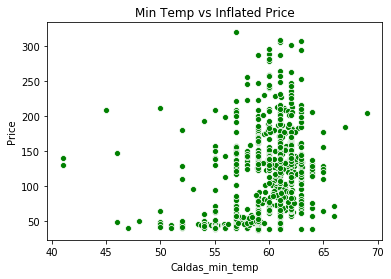

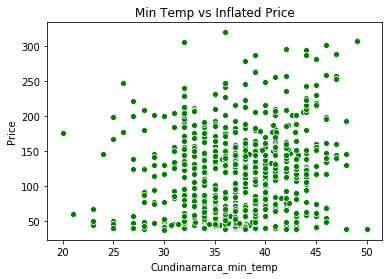

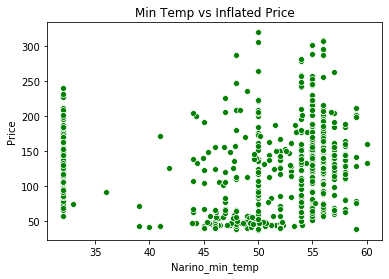

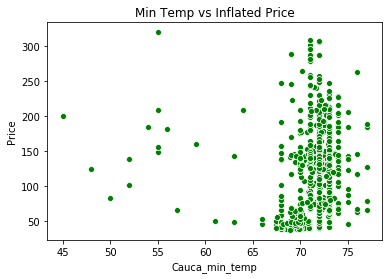

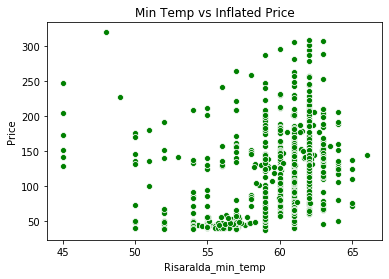

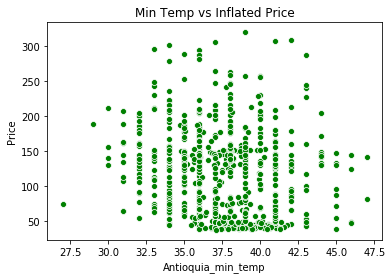

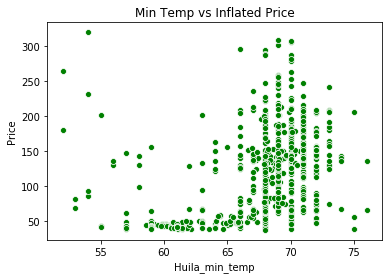

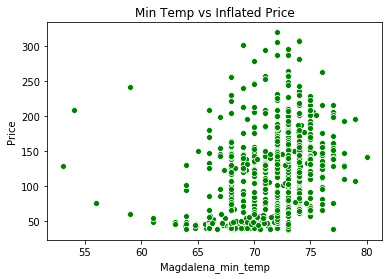

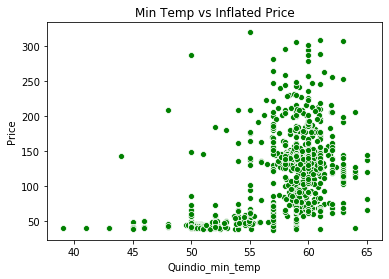

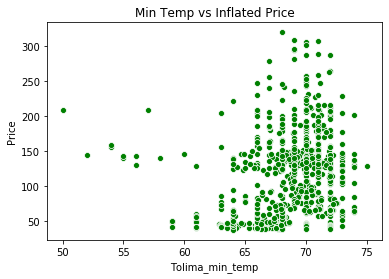

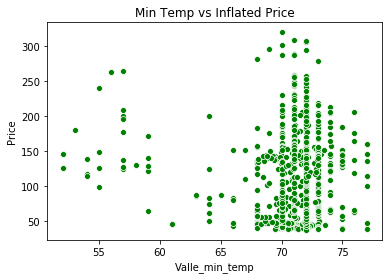

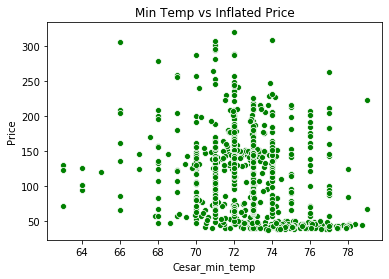

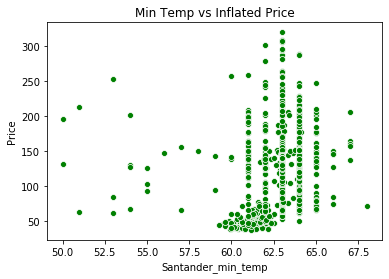

In [49]:
for col in columns:
    sns.scatterplot(df[col], df.price, color='green')
    plt.title('Min Temp vs Inflated Price')
    plt.ylabel('Price')
    plt.show()

**Takeaways:** There is no real correlation between the minimum temperature and inflated price for the regions. Each regions minimum temperature clusters around a certain area, but are pretty spread out. 

### Another viz to look at anomalous temperatures

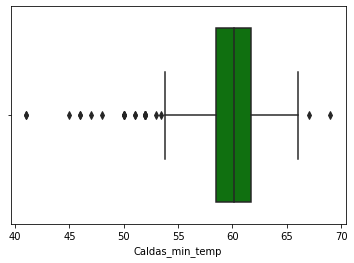

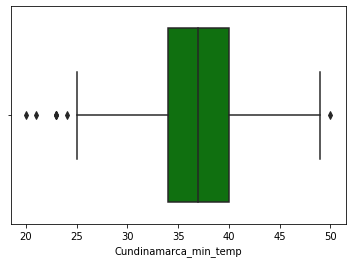

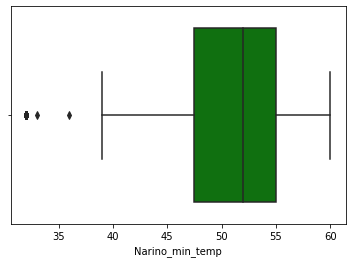

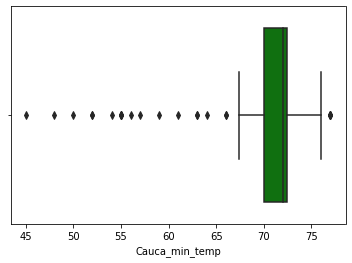

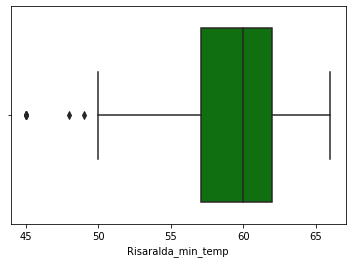

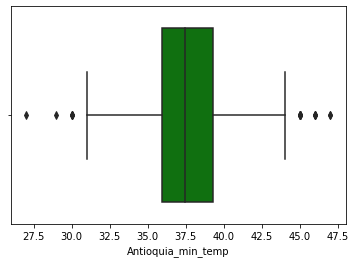

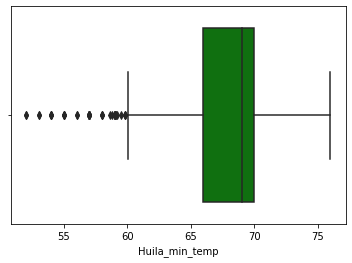

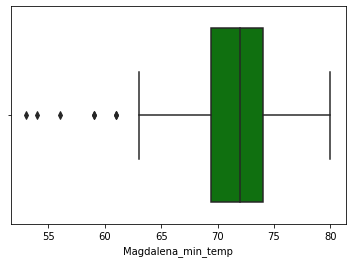

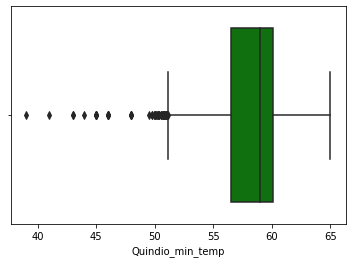

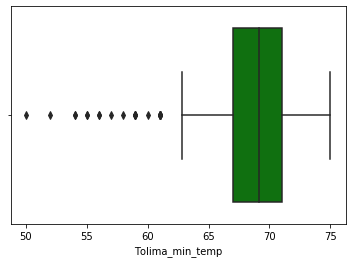

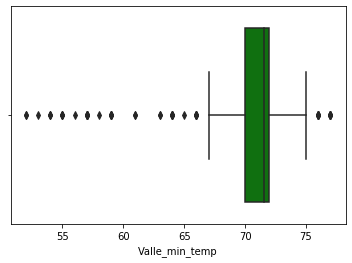

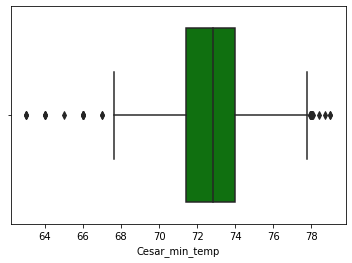

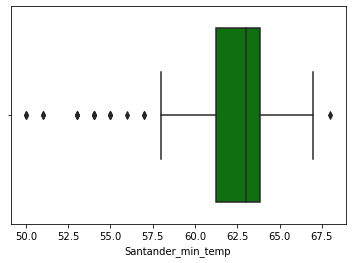

In [50]:
for col in columns:
    sns.boxplot(df[col], color='green')
    plt.show()

### Compare minimum temperature of each region

In [51]:
cauca = round(df.Cauca_min_temp.mean(),2)
narino = round(df.Narino_min_temp.mean(),2)
huila = round(df.Huila_min_temp.mean(),2)

print(f'The minimum temperature in Cauca is: {cauca} F.')
print(f'The minimum temperature in Narino is: {narino} F.')
print(f'The minimum temperature in Huila is: {huila} F.')

The minimum temperature in Cauca is: 71.12 F.
The minimum temperature in Narino is: 49.32 F.
The minimum temperature in Huila is: 67.58 F.


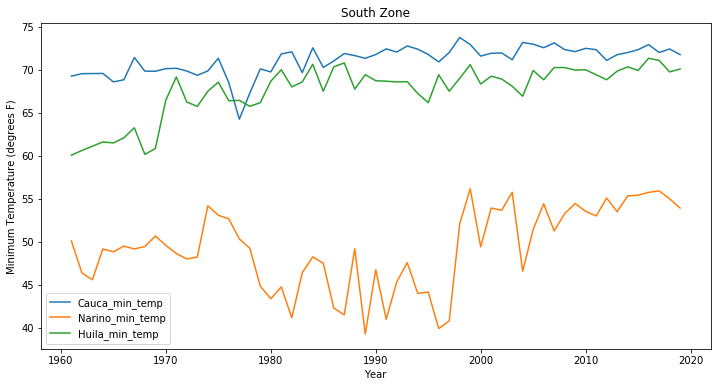

In [52]:
# South Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cauca_min_temp.resample('Y').mean())
plt.plot(df.Narino_min_temp.resample('Y').mean())
plt.plot(df.Huila_min_temp.resample('Y').mean())
plt.title('South Zone')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature (degrees F)')
plt.legend(df[['Cauca_min_temp', 'Narino_min_temp', 'Huila_min_temp']])
plt.show()

**Takeaways:** Narino has some odd dips in it compared to Cauca and Huila. 

**To Do:** Narrow in on the dips in Narino.

In [53]:
cesar = round(df.Cesar_min_temp.mean(),2)
mag = round(df.Magdalena_min_temp.mean(),2)

print(f'The minimum temperature in Cesar is: {cesar} F.')
print(f'The minimum temperature in Magdalena is: {mag} F.')

The minimum temperature in Cesar is: 72.64 F.
The minimum temperature in Magdalena is: 71.45 F.


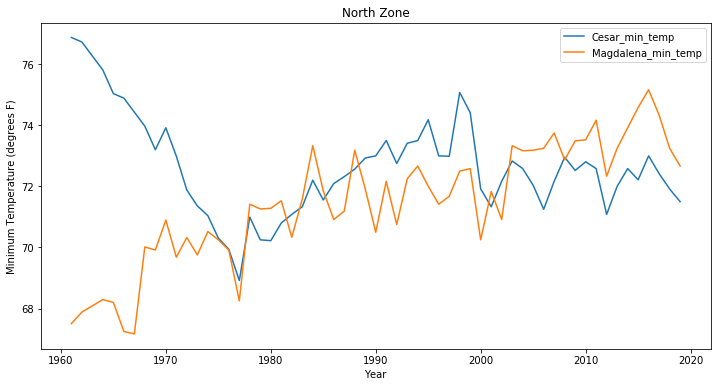

In [54]:
# North Zone
plt.figure(figsize=(12,6))
plt.plot(df.Cesar_min_temp.resample('Y').mean())
plt.plot(df.Magdalena_min_temp.resample('Y').mean())
plt.legend(df[['Cesar_min_temp', 'Magdalena_min_temp']])
plt.title('North Zone')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature (degrees F)')
plt.show()

**Takeaways:** Starting around 1977, the data evens out and is relavtively similar to each other. Prior to 1977, Cesar had a high minimum temperature, starting around 79 degree F. On the flip side, Magdalena started with a low temperature, about 64 degrees F.

**To Do:** Look at the starting temperatures for these regions.

In [55]:
df.Cesar_min_temp.max()

79.0

In [56]:
df.Magdalena_min_temp.loc['1960-01-01']

63.96198864143692

In [57]:
caldas = round(df.Caldas_min_temp.mean(),2)
ris = round(df.Risaralda_min_temp.mean(),2)
antioquia = round(df.Antioquia_min_temp.mean(),2)
tolima = round(df.Tolima_min_temp.mean(),2)
valle = round(df.Valle_min_temp.mean(),2)
quindio = round(df.Quindio_min_temp.mean(),2)

print(f'The minimum temperature in Caldas is: {caldas} F.')
print(f'The minimum temperature in Risaralda is: {ris} F.')
print(f'The minimum temperature in Antioquia is: {antioquia} F.')
print(f'The minimum temperature in Tolima is: {tolima} F.')
print(f'The minimum temperature in Valle is: {valle} F.')
print(f'The minimum temperature in Quindio is: {quindio} F.')

The minimum temperature in Caldas is: 59.6 F.
The minimum temperature in Risaralda is: 59.26 F.
The minimum temperature in Antioquia is: 37.48 F.
The minimum temperature in Tolima is: 68.71 F.
The minimum temperature in Valle is: 70.8 F.
The minimum temperature in Quindio is: 57.74 F.


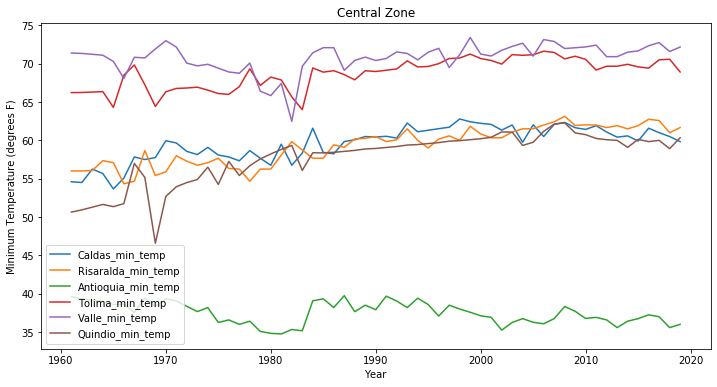

In [58]:
# Central Zone
plt.figure(figsize=(12,6))
plt.plot(df.Caldas_min_temp.resample('Y').mean())
plt.plot(df.Risaralda_min_temp.resample('Y').mean())
plt.plot(df.Antioquia_min_temp.resample('Y').mean())
plt.plot(df.Tolima_min_temp.resample('Y').mean())
plt.plot(df.Valle_min_temp.resample('Y').mean())
plt.plot(df.Quindio_min_temp.resample('Y').mean())
plt.legend(df[['Caldas_min_temp', 'Risaralda_min_temp', 'Antioquia_min_temp', 'Tolima_min_temp', 'Valle_min_temp', 'Quindio_min_temp']])
plt.title('Central Zone')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature (degrees F)')
plt.show()

**Takeaways:** The lines re very similar, not including the different temperature ranges for each region.

In [59]:
sant = round(df.Santander_min_temp.mean(),2)
cun = round(df.Cundinamarca_min_temp.mean(),2)

print(f'The minimum temperature in Santander is: {sant} F.')
print(f'The minimum temperature in Cundinamarca is: {cun} F.')

The minimum temperature in Santander is: 62.39 F.
The minimum temperature in Cundinamarca is: 36.95 F.


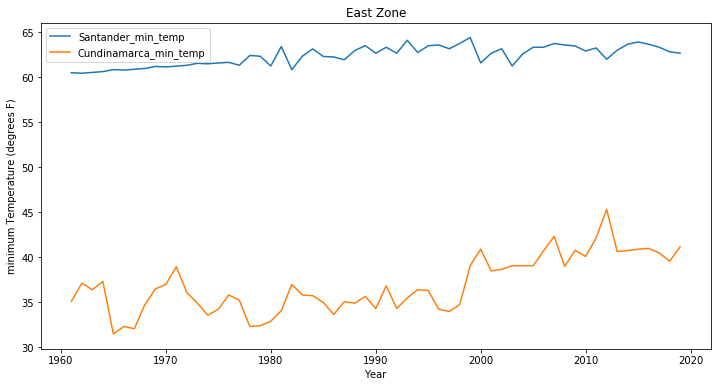

In [60]:
# East Zone
plt.figure(figsize=(12,6))
plt.plot(df.Santander_min_temp.resample('Y').mean())
plt.plot(df.Cundinamarca_min_temp.resample('Y').mean())
plt.legend(df[['Santander_min_temp', 'Cundinamarca_min_temp']])
plt.title('East Zone')
plt.xlabel('Year')
plt.ylabel('minimum Temperature (degrees F)')
plt.show()

**Takeaways:** Santander has a smoother beginning to its data, where as Cundinamarca has more volatility in its beginning years of data for minimum temperature.

### Look at the delta between the max (of the avg) temperature vs minimum temperature

**Use the get_data() df to look at the avg temp and min temp columns**
- keeping in mind there are missing values in this data

In [61]:
df1.head(2)

,region,mean_precip,mean_temp,min_temp,price,quantity,inflated
date,,,,,,,
1960-01-01,Caldas,0.04,72.50,NaN,45.68,782.0,387.519181
1960-01-01,Cundinamarca,0.28,58.25,NaN,45.68,782.0,387.519181


In [62]:
df1['delta'] = df1.mean_temp.max() - df1.min_temp

In [63]:
df1.tail(2)

,region,mean_precip,mean_temp,min_temp,price,quantity,inflated,delta
date,,,,,,,,
2018-12-01,Tolima,0.032500,83.387097,69.0,129.622903,1283.0,129.622903,22.0
2018-12-01,Valle,0.004167,85.258065,73.0,129.622903,1283.0,129.622903,18.0


### Does the delta in temperature change over time?

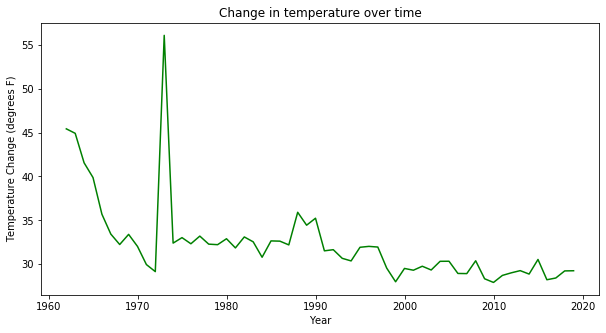

In [64]:
plt.figure(figsize=(10,5))
plt.plot(df1.delta.resample('Y').mean(), color='green')
plt.title("Change in temperature over time")
plt.xlabel('Year')
plt.ylabel('Temperature Change (degrees F)')
plt.show()

In [65]:
avg = round(df1.delta.mean(),2)
max_ = df1.delta.max()
min_ = df1.delta.min()

print(f'The average change in temperature over time is {avg} F.')
print(f'The maximum change in temperature over time is {max_} F.')
print(f'The minimum change in temperature over time is {min_} F.')

The average change in temperature over time is 31.35 F.
The maximum change in temperature over time is 71.0 F.
The minimum change in temperature over time is 11.0 F.


**Takeaways:** There is a general downward slope to the change in temperature over time.

**To Do:** Look into the large spike in temperature change around 1972. See if I can find any weather event that to map that back to that impacted coffee prices.

**Use get_prepped df to look at the delta. (no missing values)**

In [66]:
df2 = df.drop(columns=(['price', 'quantity']))

In [67]:
df2.head(2)

,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,Narino_mean_temp,Narino_min_temp,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,387.519181,0.04,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,65.709097,45.765823,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,389.809684,0.04,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,65.148039,50.533429,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367


In [68]:
df2['max_temp'] = ((df2.Caldas_mean_temp.max() + df2.Narino_mean_temp.max() + 
                    df2.Antioquia_mean_temp.max() + df2.Cauca_mean_temp.max() + 
                    df2.Quindio_mean_temp.max() + df2.Magdalena_mean_temp.max() +
                    df2.Huila_mean_temp.max() + df2.Risaralda_mean_temp.max() + 
                    df2.Tolima_mean_temp.max() + df2.Santander_mean_temp.max() +
                    df2.Cesar_mean_temp.max() + df2.Valle_mean_temp.max() + df2.Cundinamarca_mean_temp.max()) / 13)

In [69]:
df2['min_temp'] = ((df2.Caldas_min_temp + df2.Narino_min_temp + 
                    df2.Antioquia_mean_temp + df2.Cauca_min_temp + 
                    df2.Quindio_min_temp + df2.Magdalena_min_temp +
                    df2.Huila_min_temp + df2.Risaralda_min_temp + 
                    df2.Tolima_min_temp + df2.Santander_min_temp +
                    df2.Cesar_min_temp + df2.Valle_min_temp + df2.Cundinamarca_min_temp) / 13)

In [70]:
df2 = df2[['inflated', 'max_temp', 'min_temp']]

In [71]:
df2['delta_temp'] = (df2.max_temp - df2.min_temp)

In [72]:
df2.head(3)

,inflated,max_temp,min_temp,delta_temp
date,,,,
1960-01-01,387.519181,79.772741,57.803864,21.968878
1960-02-01,389.809684,79.772741,58.695773,21.076969
1960-03-01,382.598841,79.772741,59.921439,19.851302


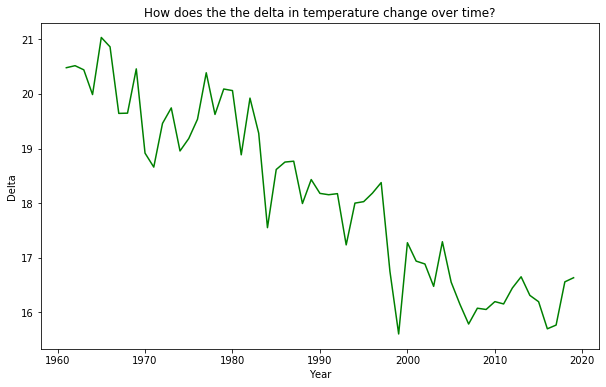

In [73]:
plt.figure(figsize=(10,6))
plt.plot(df2.delta_temp.resample('Y').mean(), color='green')
plt.title('How does the the delta in temperature change over time?')
plt.xlabel('Year')
plt.ylabel('Delta')
plt.show()

**Takeaways:** The delta in temperature has a more prominent downward slope than using the other dataframe had. The slope has pretty even peaks and dips.

**To Do:** Look at the max and min changes in temperature

In [74]:
# Max delta
round(df2.delta_temp.max(),2)

24.6

In [75]:
# Min delta
round(df2.delta_temp.min(),2)

13.48

### Look at the correlation between the delta in temp vs inflted price

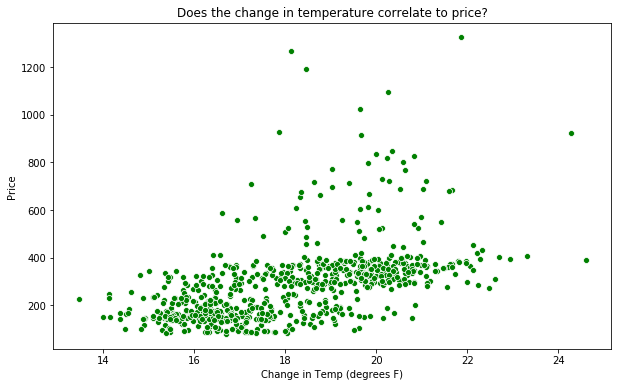

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(df2.delta_temp, df2.inflated, color='green')
plt.title('Does the change in temperature correlate to price?')
plt.xlabel('Change in Temp (degrees F)')
plt.ylabel('Price')
plt.show()

### What does the distribution of change look like?

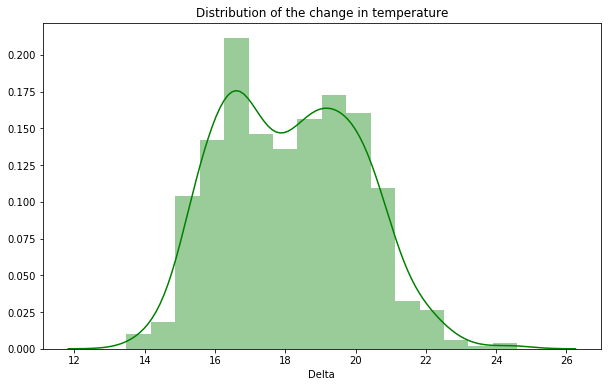

In [78]:
plt.figure(figsize=(10,6))
sns.distplot(df2.delta_temp, color='green')
plt.title('Distribution of the change in temperature')
plt.xlabel('Delta')
plt.show()

**Takeaways:** The plot is basically a normal distribution. The small dip in the middle could almost make this a bi-modal distribution.

**To Do:** Separate data into separate plots to look at two distributions for any insight.

### What does the delta look like broken into two parts?

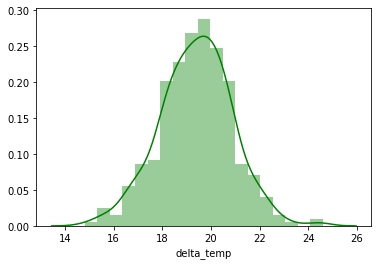

In [80]:
# Up to 1990
sns.distplot(df2.delta_temp.loc[:'1991'], color='green')
plt.show()

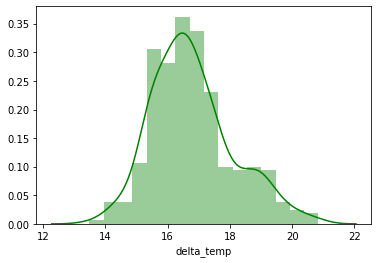

In [82]:
# 1990 to present
sns.distplot(df2.delta_temp.loc['1990':], color='green')
plt.show()

**Takeaways:** Both pre and post 1990 plots are evenly distributed.

### Which regions produce the most quantity?
Use the get_data() information

- All regions have the same quantity, it is just looking at the number of occurances.

In [83]:
df1.head()

,region,mean_precip,mean_temp,min_temp,price,quantity,inflated,delta
date,,,,,,,,
1960-01-01,Caldas,0.040000,72.500000,NaN,45.68,782.0,387.519181,NaN
1960-01-01,Cundinamarca,0.280000,58.250000,NaN,45.68,782.0,387.519181,NaN
1960-02-01,Caldas,0.040000,72.210526,NaN,45.95,449.0,389.809684,NaN
1960-02-01,Cundinamarca,0.082857,58.894737,NaN,45.95,449.0,389.809684,NaN
1960-02-01,Narino,0.015172,NaN,NaN,45.95,449.0,389.809684,NaN


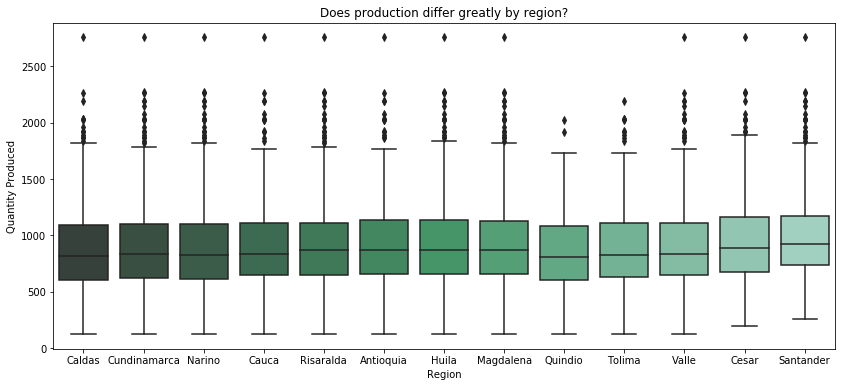

In [84]:
plt.figure(figsize=(14,6))
sns.boxplot(df1.region, df1.quantity, palette=("BuGn_d"))
plt.title('Does production differ greatly by region?')
plt.xlabel('Region')
plt.ylabel('Quantity Produced')
plt.show()

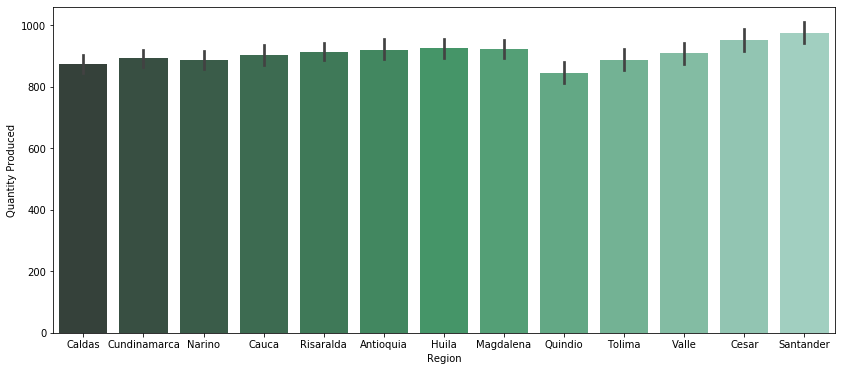

In [85]:
plt.figure(figsize=(14,6))
sns.barplot(df1.region, df1.quantity, palette=("BuGn_d"))
plt.xlabel('Region')
plt.ylabel('Quantity Produced')
plt.show()

**To Do:** Look at other the csv to to see area cultivated by region.

### What does the area cultivated look like for each region in 2018?

In [86]:
df3 = pd.read_csv('coffee_data/land_use2018.csv').rename(columns={'Unnamed: 0':'region', '2018*':'area'})

In [87]:
df3.drop([22], inplace=True)

In [88]:
df3 = df3.sort_values(by='area', ascending=False)

In [89]:
df3.reset_index(inplace=True)

In [90]:
df3.drop(columns=('index'),inplace=True)

In [91]:
df3.head()

,region,area
0,Huila,146.76
1,Antioquia,120.96
2,Tolima,111.71
3,Cauca,92.56
4,Caldas,66.02


### Look at the top areas cultivated for each region.

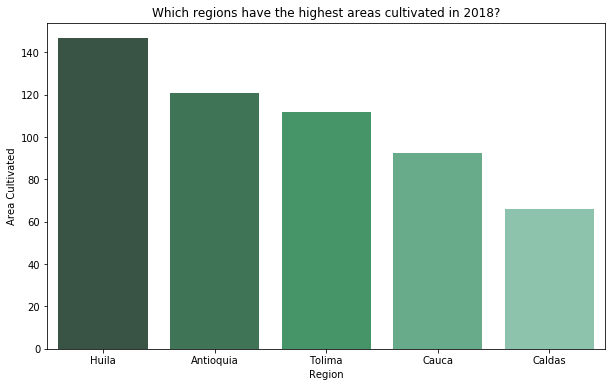

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(df3.region[:5], df3.area, palette=("BuGn_d"))
plt.title("Which regions have the highest areas cultivated in 2018?")
plt.xlabel('Region')
plt.ylabel('Area Cultivated')
plt.show()
# add in metric measured in

**Takeaways:** The regions with the most land cultivated are Huila, Antioquia, Tolima, Cauca and Caldas.

**To Do:** Look at the 13 regions we have explored in the data to see how they compare to each other.

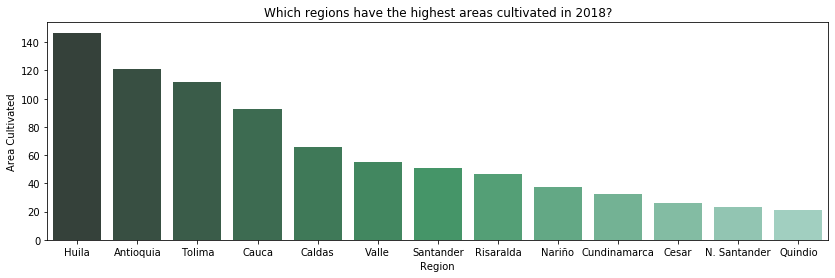

In [93]:
plt.figure(figsize=(14,4))
sns.barplot(df3.region[:13], df3.area, palette=("BuGn_d"))
plt.title("Which regions have the highest areas cultivated in 2018?")
plt.xlabel('Region')
plt.ylabel('Area Cultivated')
plt.show()

**To Do:** Separate out the regions by zone to see how each region is represented.

### Functions for the final notebook

In [94]:
# Look at five major events over time
def events_over_time():   
    plt.figure(figsize=(10,6))
    plt.plot(df.inflated, color='Green')
    date_ = '1975'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
    date_ = '1979'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
    date_ = '1985'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
    date_ = '1992'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
    date_ = '2012'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='brown')
    plt.title('Top Five Fluctations in Coffee Prices')
    plt.xlabel('Year')
    plt.ylabel('Inflated Price')
    plt.show()

In [95]:
# Look at the correlation between mean temp and inflated price
def corr_price_and_temp(df):
    columns = [col for col in df.columns if col.endswith('mean_temp')]
    for column in columns:
        sns.scatterplot(df[column], df.price, color='green')
        plt.title('Price vs Average Temperature')
        plt.ylabel('Price')
        plt.show()

In [96]:
# Look at the distribution of inflated prices
def dist_of_price(df):
    plt.figure(figsize=(10, 6))
    sns.distplot(df.inflated, color='green')
    plt.title('Inflated Price Distribution')
    plt.xlabel('Inflated Price')
    plt.show()

In [97]:
# Look at distribution of inflated price after 1992
def dist_after(df):
    plt.figure(figsize=(10, 6))
    sns.distplot(df.inflated.loc['1992':], color='green')
    plt.title('Inflated Price Distribution from 1992')
    plt.xlabel('Inflated Price')
    plt.show()

In [98]:
# Look at distribution of inflated price before 1991
def dist_before(df):
    plt.figure(figsize=(10, 6))
    sns.distplot(df.inflated.loc[:'1992'], color='green')
    plt.title('Inflated Price Distribution up to 1991')
    plt.xlabel('Inflated Price')
    plt.show()

In [99]:
# Look at which regions have the highest cultivation area
def area_cultivated():
    df3 = pd.read_csv('coffee_data/land_use2018.csv').rename(columns={'Unnamed: 0':'region', '2018*':'area'})
    df3.drop([22], inplace=True)
    df3 = df3.sort_values(by='area', ascending=False)
    df3.reset_index(inplace=True)
    df3.drop(columns=('index'),inplace=True)

    plt.figure(figsize=(14,6))
    sns.barplot(df3.region[:13], df3.area, palette=("BuGn_d"))
    plt.title("Which regions have the highest areas cultivated in 2018?")
    plt.xlabel('Region')
    plt.ylabel('Area Cultivated')
    plt.show()